Poniższe rysunki przedstawiaja 3 zbiory danych (rysunki są też dostępne jako pliki PNG na stro-
nie wykładu). 

Odtwórz zbiory danych widoczne na rysunkach i pogrupuj je algorytmami KMeans, DBScan i grupowania hierarchicznego. 
Odpowiednio dobierz parametry algorytmów. 
Porównaj i omów wyniki.

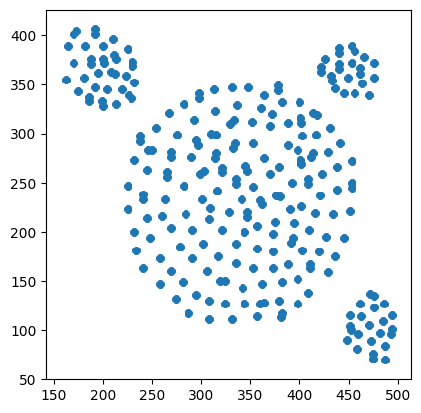

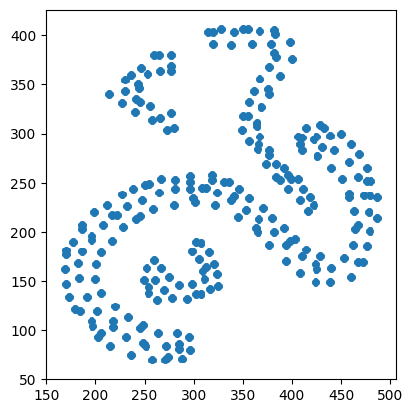

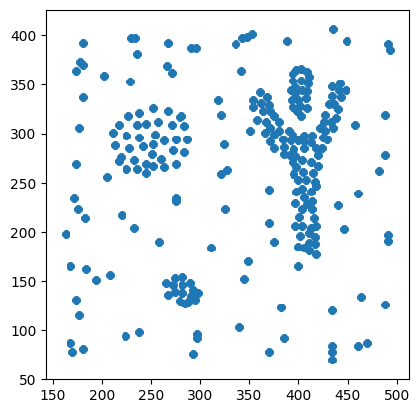

In [21]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def image_to_pixels(path, thresh=250):
    img = Image.open(path).convert("RGB")
    arr = np.array(img)
    
    brightness = arr.mean(axis=2)
    
    rows, cols = np.where(brightness < thresh)
    
    H = arr.shape[0]
    points = np.column_stack([cols, H - rows])
    return points

points1 = image_to_pixels("data/pic1.png", thresh=250)
points2 = image_to_pixels("data/pic2.png", thresh=250)
points3 = image_to_pixels("data/pic3.png", thresh=250)

def plot_points(points):
    plt.scatter(points[:,0], points[:,1], s=1)
    plt.gca().set_aspect("equal", "box")
    plt.show()

plot_points(points1)
plot_points(points2)
plot_points(points3)

KMeans

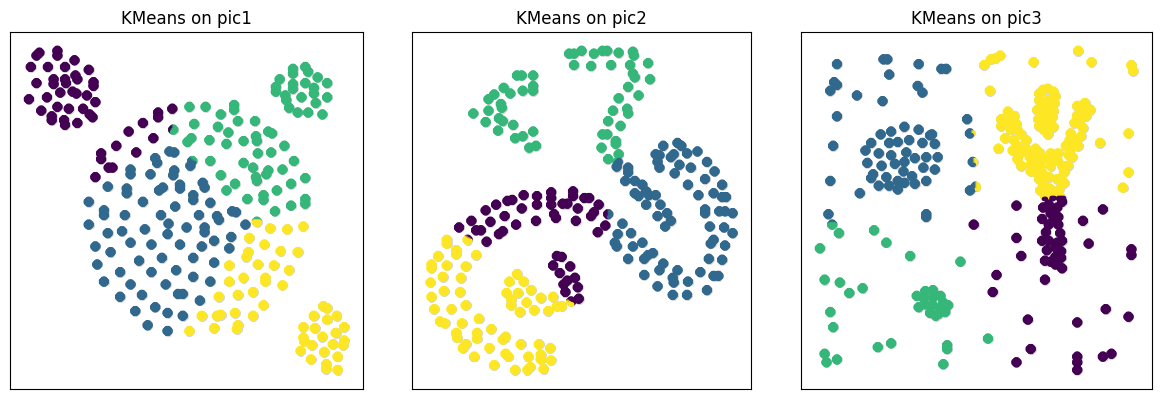

In [22]:
from sklearn.cluster import KMeans

k = 4

km1 = KMeans(n_clusters=k, n_init=10, random_state=0)
labels_km1 = km1.fit_predict(points1)

km2 = KMeans(n_clusters=k, n_init=10, random_state=0)
labels_km2 = km2.fit_predict(points2)

km3 = KMeans(n_clusters=k, n_init=10, random_state=0)
labels_km3 = km3.fit_predict(points3)

def print_sc(labels_list, titles_list):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    points_list = [points1, points2, points3]
    for ax, points, labels, title in zip(axes, points_list, labels_list, titles_list):
        ax.scatter(points[:, 0], points[:, 1], c="lightgray", s=5)
        mask = (labels != -1)
        ax.scatter(points[mask, 0], points[mask, 1], c=labels[mask], s=5)
        ax.set_title(title)
        ax.set_aspect("equal", "box")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

print_sc([labels_km1, labels_km2, labels_km3], ["KMeans on pic1", "KMeans on pic2", "KMeans on pic3"])

DBScan

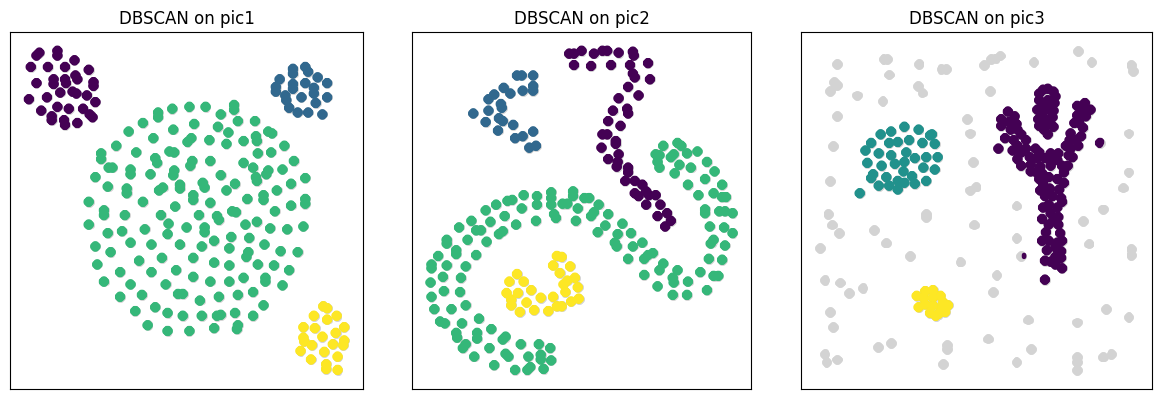

In [ ]:
from sklearn.cluster import DBSCAN

eps = 17 #dla 17 jest g
min_samples = 5  


db1 = DBSCAN(eps=17, min_samples=5)
labels_db1 = db1.fit_predict(points1)

db2 = DBSCAN(eps=17, min_samples=5)
labels_db2 = db2.fit_predict(points2)

db3 = DBSCAN(eps=20, min_samples=200)
labels_db3 = db3.fit_predict(points3)


print_sc(
    [labels_db1, labels_db2, labels_db3],
    ["DBSCAN on pic1", "DBSCAN on pic2", "DBSCAN on pic3"]
)


Grupowanie hierarchiczne

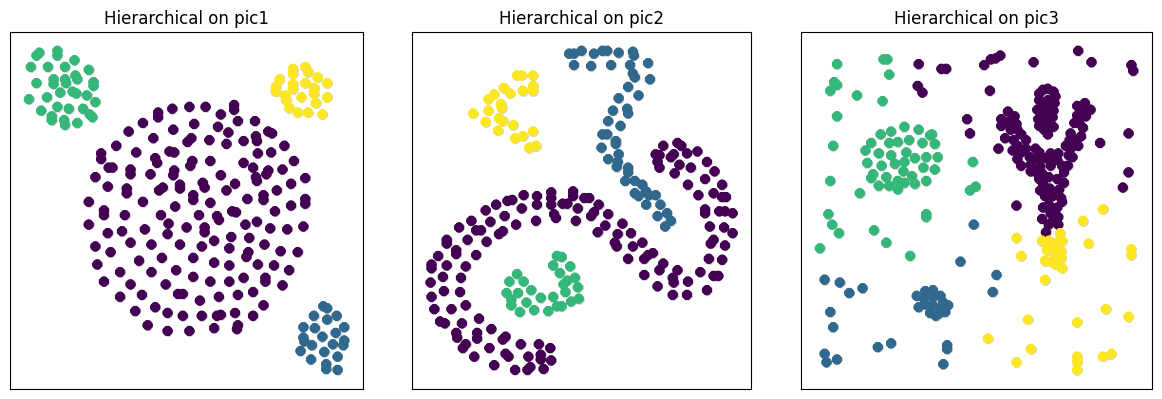

In [24]:
from sklearn.cluster import AgglomerativeClustering

link = "single"
#link = "complete"
#link = "average"
#link = "ward"

hier1 = AgglomerativeClustering(n_clusters=4, linkage=link)
labels_h1 = hier1.fit_predict(points1)

hier2 = AgglomerativeClustering(n_clusters=4, linkage=link)
labels_h2 = hier2.fit_predict(points2)

hier3 = AgglomerativeClustering(n_clusters=4, linkage="average")
labels_h3 = hier3.fit_predict(points3)

print_sc(
    [labels_h1, labels_h2, labels_h3],
    ["Hierarchical on pic1", "Hierarchical on pic2", "Hierarchical on pic3"]
)
